# pre_Data-Format
### Step_1. FormatOfficial2Yolo

In [5]:
!python Code/pre_FormatOfficial2Yolo.py

1. Renaming Training Dataset_v5 --> Training_Dataset_v5
2. Backing-up Labels to Dataset/Training_Dataset_v5/labels_origin/...
100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 5244.03it/s]
3. Formatting Official Labels to yolo Type...
100%|███████████████████████████████████████| 1000/1000 [00:39<00:00, 25.59it/s]
4. Moving Labels to Dataset/Training_Dataset_v5/train/labels...
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 19514.47it/s]
5. Moving images to Dataset/Training_Dataset_v5/train/images...
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 14029.93it/s]
6. Start Splitting 10% of Training Data to Val Data...
100%|███████████████████████████████████████| 100/100 [00:00<00:00, 7785.11it/s]


# train_Model-Baseline
### Step_2-1. Baseline model train

In [ ]:
# move the code we change in YOLOv5
!cp Code/yolov5l6.yaml yolov5/yolov5l6.yaml
!cp Code/dataset-Origin_Training_Dataset.yaml yolov5/dataset-Origin_Training_Dataset.yaml
!cp Code/hyp.none.yaml yolov5/hyp.none.yaml

!cd yolov5
!python -m torch.distributed.run --nproc_per_node 2 train.py --weights yolov5l6.pt --cfg yolov5l6.yaml --hyp hyp.none.yaml --data dataset-Training_Dataset_v5.yaml --epochs 1000 --batch-size 8 --imgsz 1920 --device 0,1 --patience 50


### Step_2-2. Baseline model detect (Public 0.70)

In [ ]:
!python detect.py --data dataset-Origin_Training_Dataset.yaml --imgsz 1080 1920 --save-txt --save-conf --weight runs/train/exp/weights/best.pt --source ../Dataset/public
!cd ..


In [10]:
!python Code/post_FormatYolo2Official.py


1. Renaming public --> Origin_Pubic_Dataset
2. Renaming Private Testing Dataset_v2 --> Origin_Private_Dataset
3. Start Transforming exp to Official Answer Format...
4. Saving Official Format Answer in Output/


# pre_Data-Cleaning
### Step_3. Analyze bbox
### Mistaken bbox

min = 0 ; max = 87655 ; mean = 1703.0942665575003 ; length = 45191


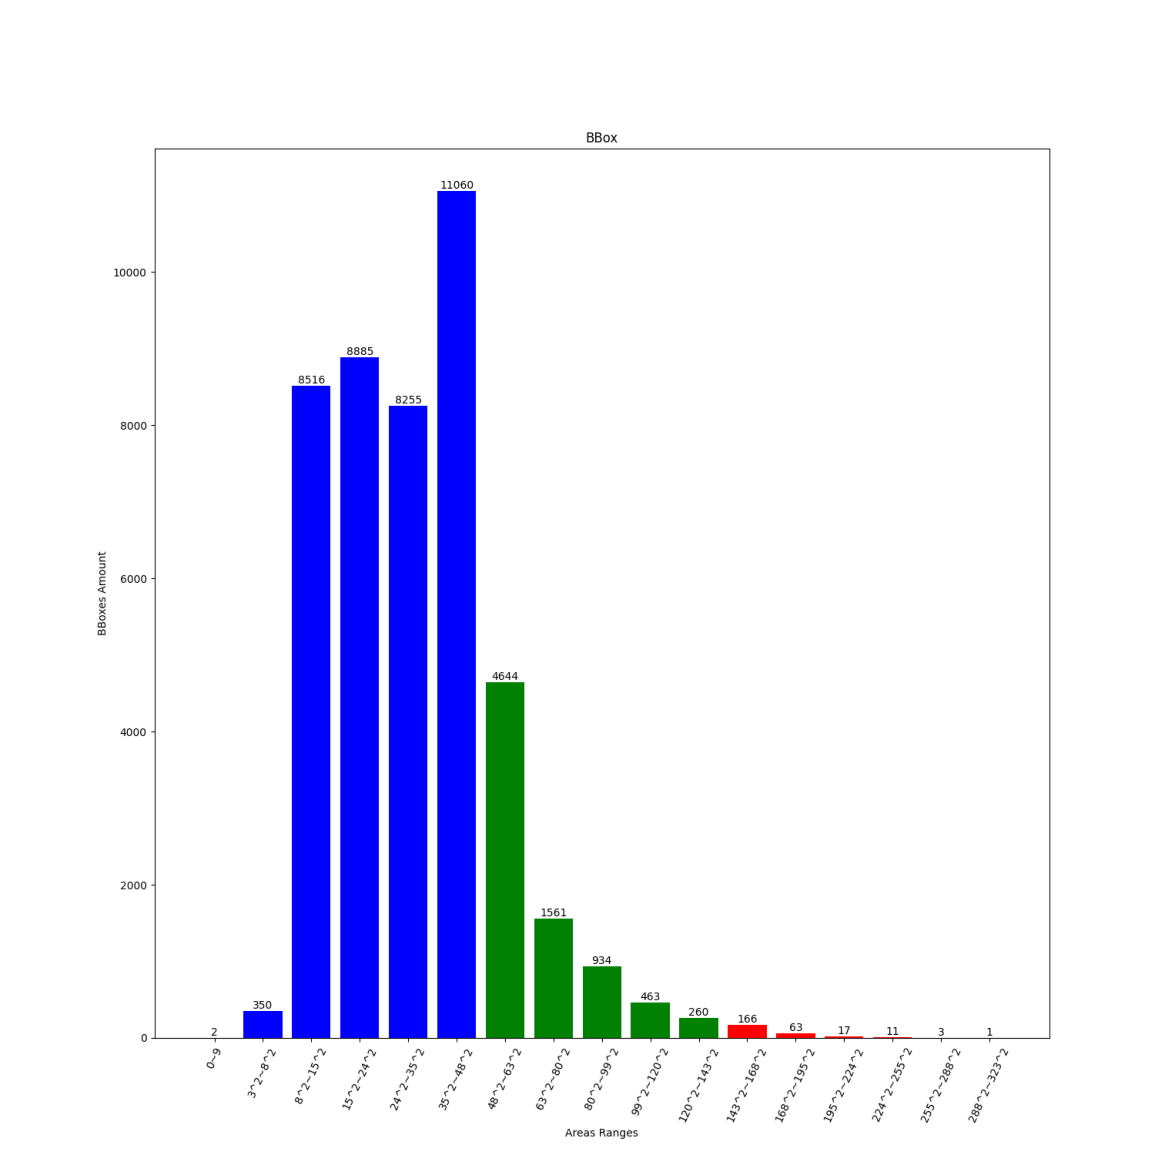

In [46]:
!python Code/pre_AnalyzeBBox_Mistaken.py

import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(cv2.imread('Output/AnalyzeBBox_Mistaken.png'))


### Outlier bbox


In [47]:
!python Code/pre_AnalyzeBBox_Outlier.py


There may be incorrect labels        car in img0004.txt with max area  3060
There may be incorrect labels        car in img0023.txt with max area  2440
There may be incorrect labels        hov in img0028.txt with max area 13272
There may be incorrect labels        car in img0036.txt with max area  2805
There may be incorrect labels        hov in img0050.txt with max area  9108
There may be incorrect labels        car in img0054.txt with max area   442
There may be incorrect labels        hov in img0057.txt with max area  4674
There may be incorrect labels motorcycle in img0060.txt with max area  2772
There may be incorrect labels        car in img0062.txt with max area  2350
There may be incorrect labels motorcycle in img0065.txt with max area  2277
There may be incorrect labels     person in img0072.txt with max area   990
There may be incorrect labels        car in img0073.txt with max area  7930
There may be incorrect labels        car in img0080.txt with max area  3016
There may be

# pre_Data-Classify
### Step_4. Classify bbox with size
### K-means


Reading car BBoxes files...
There are 960 car mean BBoxes.
Plotting... 
100%|███████████████████████████████████████| 960/960 [00:00<00:00, 1262.99it/s]

Reading hov BBoxes files...
There are 605 hov mean BBoxes.
Plotting... 
100%|███████████████████████████████████████| 605/605 [00:00<00:00, 1342.90it/s]

Reading person BBoxes files...
There are 661 person mean BBoxes.
Plotting... 
100%|███████████████████████████████████████| 661/661 [00:00<00:00, 1327.52it/s]

Reading motorcycle BBoxes files...
There are 581 motorcycle mean BBoxes.
Plotting... 
100%|███████████████████████████████████████| 581/581 [00:00<00:00, 1548.88it/s]


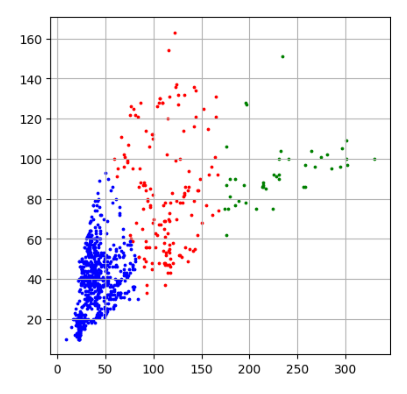

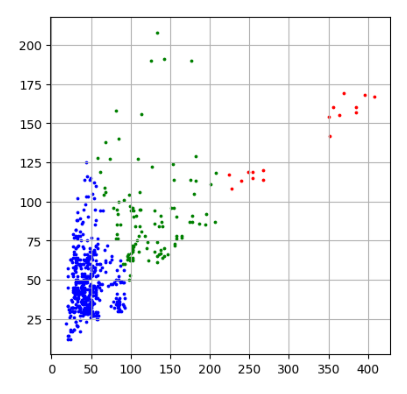

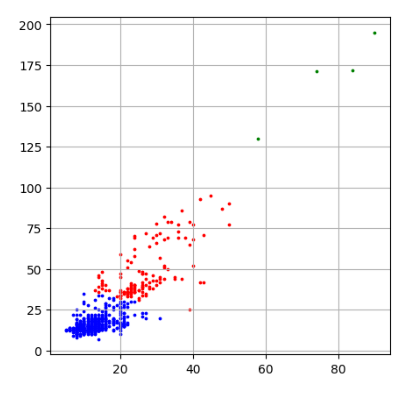

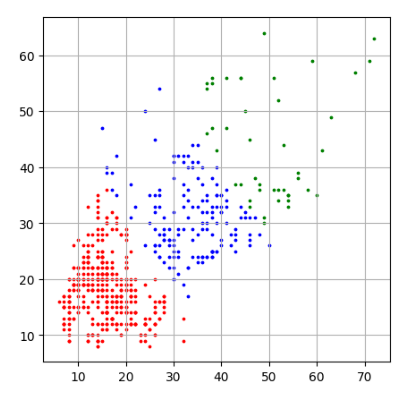

In [48]:
!python Code/pre_AnalyzeBBox_kmeans.py

import matplotlib.pyplot as plt
Classes = ['car', 'hov', 'person', 'motorcycle']

for Class in Classes:
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(cv2.imread(f'Output/AnalyzeBBox_3-means_{Class}.png'))


# pre_Data-Cleaning
### Step_5. Compare GT bbox with baseline prediction

In [ ]:
# Just simply download the labels we already re-labeled.


# pre_Data-SuperResolution
### Step_6. Resize images 2 times larger


In [ ]:
# Just simply download the images we super-resolved.


### Step_7. Resize all images to 3840x2160 with Bicubic

In [ ]:
!python pre_ResizeSuperResolution.py

# pre_Data-Cleaning
### Step_8. Filter out the ignored areas

In [ ]:
!python pre_FilterIgnoredAreas.py

# pre_Data-Slicing
### Step_9. Slice Super Resolution images (3840x2160 --> 832x832)

In [ ]:
# Create COCO format for slicing
!python pre_FormatYolo2Coco.py  --path Dataset/SuperResolution_Training_Dataset

!pytohn pre_Slicing.py

# pre_Data-Augmentation
Step_11. Augmentation

In [ ]:
# move the code we change in MMDetection
!cp Code/mm__init__.py mmdetection/mmdet/datasets/pipelines/__init__.py
!cp Code/browse_dataset.py mmdetection/tools/misc/browse_dataset.py
!cp Code/image.py mmdetection/mmdet/core/visualization/image.py
!cp Code/SmallObjectAugmentation.py mmdetection/mmdet/datasets/pipelines/SmallObjectAugmentation.py
!cp Code/transform.py mmdetection/ mmdetection/mmdet/datasets/pipelines/transform.py
!cp Code/dataset_visualize.py mmdetection/dataset_visualize.py

import os

if not os.path.exists('Dataset/SuperResolution_Training_Sliced_Augmentation'):
    os.mkdir('Dataset/SuperResolution_Training_Sliced_Augmentation')

!cd mmdetection
!python ./tools/misc/browse_dataset.py dataset_visualize.py --output-dir ../Dataset/SuperResolution_Training_Sliced_Augmentation/ --not-show

!cd ..

# train_Model-832x832
### Step_12-1. 832x832 model train


In [ ]:
import random
from tqdm import tqdm

print('Start Splitting 10% of Training Data to Val Data...')

TrainingDatasetRoot = 'Dataset/SuperResolution_Training_Sliced_Augmentation'
os.mkdir(f'{TrainingDatasetRoot}train')
os.mkdir(f'{TrainingDatasetRoot}train/images')
os.mkdir(f'{TrainingDatasetRoot}train/labels')
os.mkdir(f'{TrainingDatasetRoot}val')
os.mkdir(f'{TrainingDatasetRoot}val/images')
os.mkdir(f'{TrainingDatasetRoot}val/labels')
val_index = random.sample(range(1, 1000), 100)
for index in tqdm(val_index):
    os.rename(f'{TrainingDatasetRoot}train/images/img{index:04d}.png',
              f'{TrainingDatasetRoot}val/images/img{index:04d}.png')
    os.rename(f'{TrainingDatasetRoot}train/labels/img{index:04d}.txt',
              f'{TrainingDatasetRoot}val/labels/img{index:04d}.txt')

!cd yolov5
!python -m torch.distributed.run --nproc_per_node 2 train.py --weights yolov5l6.pt --cfg yolov5l6.yaml --hyp hyp.high_custom.yaml --data dataset-SuperResolution_Training_Sliced_Augmentation.yaml --epochs 1000 --batch-size 20 --imgsz 1664 --device 0,1 --patience 50


### Step_12-2. 832x832 model detect (Public 0.724934 / Private 0.753749)

In [ ]:
!cp -R Dataset/SuperResolution_Public_Dataset/*.png Dataset/SuperResolution_PublicPrivate_Dataset/

!python detect.py --data dataset-SuperResolution_Training_Sliced_Augmentation.yaml --imgsz 3072 5376 --save-txt --save-conf --weight runs/train/exp2/weights/best.pt --source ../Dataset/SuperResolution_PublicPrivate_Dataset
!cd ..


In [ ]:
!python Code/post_FormatYolo2Official.py

### Step_12-2. 832x832 model detect WBF with Baseline model (Public 0.725854 / Private 0.754987)
# This is a mysterious step, but it made the highest score !


In [ ]:
# Detect the super-resolved public and private images with baseline model first
!cd yolov5
!python detect.py --data dataset-Origin_Training_Dataset.yaml --imgsz 3072 5376 --save-txt --save-conf --weight runs/train/exp/weights/best.pt --source ../Dataset/SuperResolution_PublicPrivate_Dataset
!cd ..

In [ ]:
# WBF the result of 832x832 model and baseline model with weights of 1.3 : 1

!python Code/post_WBF.py


In [ ]:
!python Code / post_FormatYolo2Official.py
